In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

        


In [17]:
np.random.seed(7)

In [22]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv


--2020-09-04 14:42:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-09-04 14:42:49 (305 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [23]:
df = pd.read_csv('loan_train.csv')

In [24]:
df.shape

(346, 10)

In [25]:
df['due date'] = pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,due date
0,0,0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,male,2016-10-07
1,2,2,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,female,2016-10-07
2,3,3,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,male,2016-09-22
3,4,4,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,female,2016-10-08
4,6,6,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,male,2016-10-08


In [26]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [28]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

<function matplotlib.pyplot.show(*args, **kw)>

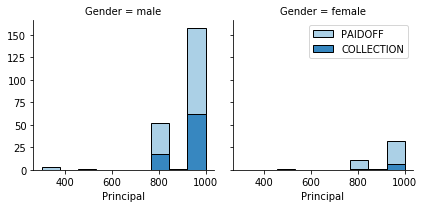

In [37]:
import seaborn as sns

bins=np.linspace(df.Principal.min(),df.Principal.max(),10)
g = sns.FacetGrid(df, col="Gender",hue="loan_status",palette="Blues", col_wrap=2)
g.map(plt.hist,'Principal',bins=bins,ec="k")

g.axes[-1].legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

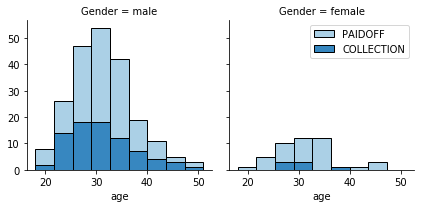

In [39]:
bins=np.linspace(df.age.min(),df.age.max(),10)
g = sns.FacetGrid(df, col="Gender",hue="loan_status",palette="Blues", col_wrap=2)
g.map(plt.hist,'age',bins=bins,ec="k")

g.axes[-1].legend()
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

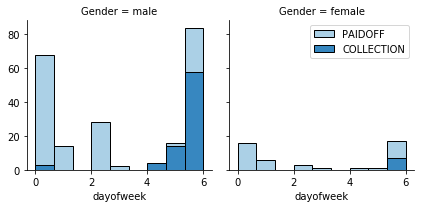

In [40]:
df['dayofweek']=df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(),df.dayofweek.max(),10)
g = sns.FacetGrid(df, col="Gender",hue="loan_status",palette="Blues", col_wrap=2)
g.map(plt.hist,'dayofweek',bins=bins,ec="k")

g.axes[-1].legend()
plt.show



In [51]:
df['weekend']=df['dayofweek'].apply(lambda x:1 if (x>3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,due date,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,male,2016-10-07,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,female,2016-10-07,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,male,2016-09-22,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,female,2016-10-08,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,male,2016-10-08,4,1


In [52]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [53]:
df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,due date,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,0,2016-10-07,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,1,2016-10-07,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,0,2016-09-22,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,1,2016-10-08,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,0,2016-10-08,4,1


In [55]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [60]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [62]:
Feature=df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


In [64]:
X=  Feature
X[0:5]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


In [67]:
y=df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1])
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [76]:
from sklearn.metrics import jaccard_similarity_score

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score



In [78]:
X_train,y_train=X,y

In [79]:
X_train.shape,y_train.shape

((346, 9), (346,))

In [80]:
trainScores={}

In [85]:
from sklearn.neighbors import KNeighborsClassifier
bestScore=0.0
accList=[]
for K in range(3,12):
    clf_knn=KNeighborsClassifier(n_neighbors=K,algorithm='auto')
    score=cross_val_score(clf_knn,X,y,cv=10)
    score=score.mean()
    accList.append(score)
    if score>bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=K
print("best K is",bestK,"|cross validation accuracy:",bestScore)
clf_knn=best_clf

best K is 8 |cross validation accuracy: 0.740672268907563


In [86]:
clf_knn.fit(X_train,y_train)
y_pred=best_clf.predict(X_train)

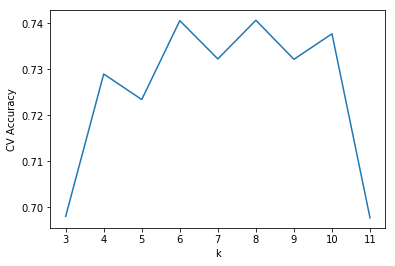

In [105]:
plt.plot(range(3,12),accList)
plt.xlabel('k')
plt.ylabel('CV Accuracy')
plt.show()

In [106]:
from sklearn import tree
clf_tree=tree.DecisionTreeClassifier()
clf_tree=clf_tree.fit(X_train,y_train)
y_pred=clf_tree.predict(X_train)

In [ ]:
trainn